# Тест Манна Уітні

## Теоретичні відомості

Популярним непараметричним тестом для порівняння спостережень між двома незалежними групами є U-тест Манна Вітні. Тест **Mann Whitney**, який іноді називають тестом **Mann Whitney Wilcoxon** або **Wilkoxon Rank Sum Test**, використовується для перевірки того, чи можуть **дві** групи спостережень походити з однієї сукупності (тобто, що **дві** групи мають однакову форму).

У даній роботі розглядається двосторонній тест Манна Уітні, тобто інтерес, що полягає у виявленні позитивного чи негативного зрушення однієї сукупності порівняно з іншою, **відсутній**.

### Вимоги до даних

Для використання даного критерію обов'язковим є:


1.   Залежна змінна має бути безперервною або представлена на порядковій шкалі.
2.   Групи мають бути незалежними.
3. Спостереження у групах є незалежними.
4. Розподіл залежної змінної у групах не є нормальним.
5. Кількість спостережень у групах не обов'язково є однаковим


### Гіпотеза

Гіпотеза, яка перевіряєть даним тестом може бути виражена наступним чином:

$H_0 : μ_1  = μ_2$ («групи рівні»)

$H_1 : μ_1  ≠ μ_2$ («групи відмінні»)

Тут $μ_1$ - середнє значення змінної в першій групі; $μ_2$ - середнє значення змінної в другій групі.

### Алгоритм розрахунку

1. Перед визначенням відмінності між групами неохідно спостереження з обох груп представити у вигляді спільного ранжованого ряду. Далі відбувається присвоєння рангів кожному спостереженню від 1 до об'єму об'єднаної вибірки. Тому в об'єднаній вибірці необхідно пам'ятати, до якої групи кожне спостереження належить. Якщо кілька значень співпадають, то необхідно їм присвоїти ранг, узявши середнє арифметичне відповідних рангів.

Група 1  | Група 2 | Група 1 в ранжованому ряді | Група 2 в ранжованому ряді | Ранги для 1 групи |  Ранги для 2 групи
-------- | ------- | -------------------------- | -------------------------- | ----------------- | ------------------
$x_8$    | $x_2$   | $x_1$                      |                            | 1                 |
$x_1$    | $x_3$   |                            | $x_2$                      |                   | 2 
$x_7$    | $x_5$   |                            | $x_3$                      |                   | 3
$x_6$    | $x_9$   | $x_4$                      |                            | 4                 | 
$x_4$    |         | $x_6$                      | $x_5$                      | 5.5               | 5.5
         |         | $x_7$                      |                            | 7                 | 
         |         | $x_8$                      |                            | 8                 | 
         |         |                            | $x_9$                      |                   | 9
         
де $x_i$ - значення змінної, $x_1$ ≤ $x_2$ ≤ ... ≤ $x_{n_1+n_2}$, $x_5$ = $x_6$, $n_1$-об'єм 1 групи, $n_2$-об'єм 2 групи.

Сума усіх рангів у результаті повинна дорівнювати наступній величині:
$\frac{n (n + 1)}{2}$, де $n = n_1+n_2$ - об'єм об'єднаної вибірки.

2. Далі необхідно підсумувати ранги для кожної групи:

$R_1$  | $R_2$ 
-------- | -------
25.5     | 19.5


3. Опісля вираховується статистика $U$, яка є меншим значенням серед $U_1$ та $U_2$:

$$U_1 = n_1n_2+\frac{n_1(n_1+1)}{2} - R_1$$
$$U_2 = n_1n_2+\frac{n_2(n_2+1)}{2} - R_2$$

4. Далі з таблиці критичних значень $U$ обирається відповідне $U_{critical}$, зачасту воно відповідає рівню значимості $\alpha$ = 0.01 або $\alpha$ = 0.05.

У разі, якщо $U ≤ U_{critical}$, то нульова гіпотеза відхиляється та приймається гіпотеза про відмінність груп.

## Реалізація алгоритму

### Дані

Дані були узяті з реального життя і представляють собою дві групи ФБМІ, БС-81 та БС-82 та рейтинги успішності студентів цих груп за перший курс.

Рейтингові бали обирались лише тих студентів, які вчасно (без перескладань) склали сесію.

Метою проведення тесту є виявлення статистичної розбіжності між групами, тобто чи студенти однієї групи мають кращу встигаємість ніж студенти іншої групи.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

BC-81:
                    name   mark
1       Алфьоров Андрій  74.67
2       Волосожар Дар'я  87.78
3       Гладкий Ярослав  97.00
4    Збаровський Дмитро  78.56
5   Карабінський Богдан  89.67
6       Лобунько Дмитро  86.33
7   Мишкарьова Ангеліна  78.33
8          Мумінов Асір  87.22
9     Погребенко Василь  90.89
10        Радченко Олег  82.33
11  Соловйова Анастасія  82.33

BC-82:
                    name   mark
1        Біжнюк Віталій  82.67
2     Бондарчук Євгеній  87.67
3   Буркевич Олександра  82.56
4        Гаврилюк Роман  77.44
5       Грініх Катерина  91.78
6         Кононов Антон  85.44
7    Любченко Мирослава  94.56
8         Любшин Микита  87.78
9     Руденко Мирослава  83.67
10         Трегуб Софія  84.22
11    Французьонок Ілля  79.89


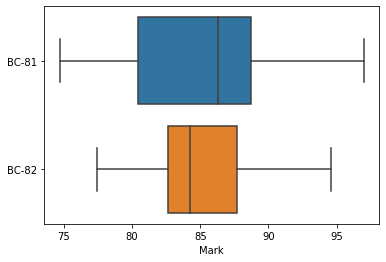

In [2]:
def read_data():
    col_names = ['name', 'mark']
    
    group1 = pd.read_excel('bc-81.xlsx', header=None, names=col_names)
    group1.index += 1
    print('BC-81:\n', group1, end='\n\n')
    
    group2 = pd.read_excel('bc-82.xlsx', header=None, names=col_names)
    group2.index += 1
    print('BC-82:\n', group2)
    
    data = pd.DataFrame({
            'BC-81': group1['mark'],
            'BC-82': group2['mark'],
        })
    
    sns.boxplot(data=data, orient='h').set(xlabel='Mark')
    
    return data

data = read_data()

In [3]:
data

,BC-81,BC-82
1,74.67,82.67
2,87.78,87.67
3,97.00,82.56
4,78.56,77.44
5,89.67,91.78
6,86.33,85.44
7,78.33,94.56
8,87.22,87.78
9,90.89,83.67
10,82.33,84.22


In [25]:
def get_ordered(data):
    array = data.values.ravel()
    array.sort()
    
    marks_gr1 = data.iloc[:, 0]
    marks_gr2 = data.iloc[:, 1]
    
    ordered_gr1 = []
    ordered_gr2 = []
    
    # both arrays consist values
    while marks_gr1.size != 0 and marks_gr2.size != 0:
        if marks_gr1.min() < marks_gr2.min():
            ordered_gr1.append(marks_gr1.min())
            ordered_gr2.append(None)
            marks_gr1.drop(marks_gr1.idxmin(), inplace=True)
        elif marks_gr1.min() > marks_gr2.min():
            ordered_gr2.append(marks_gr2.min())
            ordered_gr1.append(None)
            marks_gr2.drop(marks_gr2.idxmin(), inplace=True)
        else:
            ordered_gr1.append(marks_gr1.min())
            ordered_gr2.append(marks_gr2.min())
            marks_gr1.drop(marks_gr1.idxmin(), inplace=True)
            marks_gr2.drop(marks_gr2.idxmin(), inplace=True)
        
    # only 1st array consists values
    if marks_gr1.size != 0:
        for mark in marks_gr1:
            ordered_gr1.append(mark)
            ordered_gr2.append(None)
    # only 2nd array consists values
    elif marks_gr2.size != 0:
        for mark in marks_gr2:
            ordered_gr1.append(None)
            ordered_gr2.append(mark)
            
    ordered_data = pd.DataFrame({
            'Ordered BC-81': ordered_gr1,
            'Ordered BC-82': ordered_gr2
        })
    
    ordered_data.index += 1
    
    return ordered_data
    
ordered_data = get_ordered(data)
ordered_data.fillna('')

,Ordered BC-81,Ordered BC-82
1,74.67,
2,,77.44
3,78.33,
4,78.56,
5,,79.89
6,82.33,
7,82.33,
8,,82.56
9,,82.67
10,,83.67


In [26]:
def get_ranks(ordered_data):
    
    marks_gr1 = ordered_data['Ordered BC-81']
    marks_gr2 = ordered_data['Ordered BC-82']
    
    ranks_gr1 = []
    ranks_gr2 = []
    
    size = marks_gr1.size
    
    i = 1
    
    # additional ranks if identical values exists in both groupes before
    plus_ranks = 0
    
    while True:
        
        # set current from 1st or 2nd group
        try:
            current_mark = marks_gr1[i] if not np.isnan(marks_gr1[i]) else marks_gr2[i]
        except KeyError:
            break
        
        # plus 1 as counting started at 0
        temp_ranks_gr1 = np.where(marks_gr1 == current_mark)[0] + 1 + plus_ranks
        temp_ranks_gr2 = np.where(marks_gr2 == current_mark)[0] + 1 + plus_ranks
        
        # if mark was not found in 2nd group
        if temp_ranks_gr2.size == 0:
            actual_rank = temp_ranks_gr1.sum()/temp_ranks_gr1.size
            for r in range(temp_ranks_gr1.size):
                ranks_gr1.append(actual_rank)
                ranks_gr2.append(None)
            i += temp_ranks_gr1.size
        # if mark was not found in 1st group
        elif temp_ranks_gr1.size == 0:
            actual_rank = temp_ranks_gr2.sum()/temp_ranks_gr2.size
            for r in range(temp_ranks_gr2.size):
                ranks_gr1.append(None)
                ranks_gr2.append(actual_rank)
            i += temp_ranks_gr2.size
        # if mark was found in both groups
        else:
            temp_ranks = np.concatenate((temp_ranks_gr1, temp_ranks_gr2))
            actual_rank = sum(range(i, i+temp_ranks.size))/temp_ranks.size
            for r in range(temp_ranks.size):
                if r < temp_ranks_gr1.size and r < temp_ranks_gr2.size:
                    ranks_gr1.append(actual_rank)
                    ranks_gr2.append(actual_rank)
                elif r < temp_ranks_gr1.size:
                    ranks_gr1.append(actual_rank)
                    ranks_gr2.append(None)
                elif r < temp_ranks_gr2.size:
                    ranks_gr1.append(None)
                    ranks_gr2.append(actual_rank)
            
            plus_ranks += min(temp_ranks_gr1.size, temp_ranks_gr2.size)
            i += max(temp_ranks_gr1.size, temp_ranks_gr2.size)
        
    ranks_data = pd.DataFrame({
        'Ranks BC-81': ranks_gr1,
        'Ranks BC-82': ranks_gr2
        })

    ranks_data.index+=1

    return ranks_data
    
ranks = get_ranks(ordered_data)
ranks.fillna('')

,Ranks BC-81,Ranks BC-82
1,1,
2,,2
3,3,
4,4,
5,,5
6,6.5,
7,6.5,
8,,8
9,,9
10,,10


In [27]:
result = pd.concat([data, ordered_data, ranks], axis=1)
result.fillna('')

,BC-81,BC-82,Ordered BC-81,Ordered BC-82,Ranks BC-81,Ranks BC-82
1,74.67,82.67,74.67,,1,
2,87.78,87.67,,77.44,,2
3,97,82.56,78.33,,3,
4,78.56,77.44,78.56,,4,
5,89.67,91.78,,79.89,,5
6,86.33,85.44,82.33,,6.5,
7,78.33,94.56,82.33,,6.5,
8,87.22,87.78,,82.56,,8
9,90.89,83.67,,82.67,,9
10,82.33,84.22,,83.67,,10


In [28]:
def get_sum_of_ranks(ranks_data):
    ranks_gr1 = ranks_data.iloc[:, 0]
    ranks_gr2 = ranks_data.iloc[:, 1]
    sum_ranks_gr1 = ranks_gr1.sum()
    sum_ranks_gr2 = ranks_gr2.sum()
    
    sum_of_ranks = pd.DataFrame({
        'Ranks BC-81': [sum_ranks_gr1],
        'Ranks BC-82': [sum_ranks_gr2],
    }, index = ['Sum'])
    
    return sum_of_ranks
    
sum_of_ranks = get_sum_of_ranks(ranks)
sum_of_ranks

,Ranks BC-81,Ranks BC-82
Sum,123.5,129.5


In [44]:
def MannWhitneyTest(data, sum_of_ranks):
    n1 = data.iloc[:, 0].dropna().size
    n2 = data.iloc[:, 1].dropna().size
    
    U1 = n1*n2 + n1*(n1+1)/2 - sum_of_ranks.iloc[0, 0]
    U2 = n1*n2 + n2*(n2+1)/2 - sum_of_ranks.iloc[0, 1]
    
    U = min(U1, U2)
    
    return U, n1, n2
    
U, n1, n2 = MannWhitneyTest(data, sum_of_ranks)
U

57.5

In [52]:
def compare_with_critical(U, n1, n2):
    crit_values = pd.read_excel('mann_whitney_critical_05.xlsx', index='n1\n2')
    crit_values.set_index('n1\\n2', inplace=True)
    
    try:
        critical_value = crit_values.loc[n1, n2]
    except KeyError:
        critical_value = '-'
    
    if (critical_value != '-'):
        hypothesis_0 = 'rejected' if U < critical_value else 'accepted'
    else:
        hypothesis_0 = 'unknown'
        
    return hypothesis_0

H0 = compare_with_critical(U, n1, n2)

print('Hypothesis 0 -', H0)

Hypothesis 0 - accepted


# Висновок

#### Під час порівняння двох груп на рівність середніх з використанням непараметричного тесту Манна Уітні було отримано результат, який зі статистичною значимістю 0.95 дозволяє стверджувати про рівність груп.

Отже, можна зробити висновок, що студенти обох груп мають однакову встигаємість.